# Retrieve data with APIs from Python

Lino Galiana  
2025-03-19

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«04c_API_TP»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/manipulation%2004c_API_TP%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«04c_API_TP»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/manipulation%2004c_API_TP%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

<div class="callout callout-style-default callout-note callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container"><i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Version 🇫🇷
</div>
</div>
<div class="callout-body-container callout-body">
This is the French version 🇫🇷 of that chapter,to see the English version go <a href="https://pythonds.linogaliana.fr/content/manipulation/04c_API_TP.html">there</a>
</div>
</div>

# 1. Introduction: What is an API?

In the previous chapters, we saw how to consume data from a file (the simplest access mode) or how to retrieve data through web scraping, a method that allows `Python` to mimic the behavior of a web browser and extract information by harvesting the HTML that a website serves.

Web scraping is a makeshift approach to accessing data. Fortunately, there are other ways to access data: data APIs. In computing, an API is a set of protocols that enables two software systems to communicate with each other. For example, the term “Pandas API” is sometimes used to indicate that `Pandas` serves as an interface between your `Python` code and a more efficient compiled language (`C`) that performs the calculations you request at the Python level. The goal of an API is to provide a simple access point to a functionality while hiding the implementation details.

In this chapter, we focus mainly on data APIs. They are simply a way to make data available: rather than allowing the user direct access to databases (often large and complex), the API invites them to formulate a query which is processed by the server hosting the database, and then returns data in response to that query.

The increased use of APIs in the context of open data strategies is one of the pillars of the 15 French ministerial roadmaps regarding the opening, circulation, and valorization of public data.

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

In recent years, an official geocoding service has been established for French territory. It is free and efficiently allows addresses to be geocoded via an API. This API, known as the **National Address Database (BAN)**, has benefited from the pooling of data from various stakeholders (local authorities, postal services, IGN) as well as the expertise of contributors like Etalab. Its documentation is available at <https://api.gouv.fr/les-api/base-adresse-nationale>.

</div>

A common example used to illustrate APIs is that of a restaurant. The documentation is like your menu: it lists the dishes (databases) that you can order and any optional ingredients you can choose (the parameters of your query): chicken, beef, or a vegetarian option? When you order, you don’t get to see the recipe used in the kitchen to prepare your dish – you simply receive the finished product. Naturally, the more refined the dish you request (i.e. involving complex calculations on the server side), the longer it will take to arrive.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Illustration with the BAN API</h3>

To illustrate this, let’s imagine what happens when, later in the chapter, we make requests to the BAN API.

Using `Python`, we send our order to the API: addresses that are more or less complete, along with additional instructions such as the municipality code. These extra details are akin to information provided to a restaurant’s server—like dietary restrictions—which personalize the recipe.

Based on these instructions, the dish is prepared. Specifically, a routine is executed on Etalab’s servers that searches an address repository for the one most similar to the address requested, possibly adapting based on the additional details provided. Once the kitchen has completed this preparation, the dish is sent back to the client. In this case, the “dish” consists of geographic coordinates corresponding to the best matching address.

Thus, the client only needs to focus on submitting a proper query and enjoying the dish delivered. The complexity of the process is handled by the specialists who designed the API. Perhaps other specialists, such as those at Google Maps, implement a different recipe for the same dish (geographic coordinates), but they will likely offer a very similar menu. This greatly simplifies your work: you only need to change a few lines of API call code rather than overhauling a long and complex set of address identification methods.

</div>

## Pedagogical Approach

After an initial presentation of the general principle of APIs, this chapter illustrates their use through `Python` via a fairly standard use case: we have a dataset that we first want to geolocate. To do this, we will ask an API to return geographic coordinates based on addresses. Later, we will retrieve somewhat more complex information through other APIs.

# 2. First Use of APIs

An API is intended to serve as an intermediary between a client and a server. This client can be of two types: a web interface or programming software. The API makes no assumptions about the tool sending it a command; it simply requires adherence to a standard (usually an HTTP request), a query structure (the arguments), and then awaits the result.

## 2.1 Understanding the Principle with an Interactive Example

The first mode (access via a browser) is primarily used when a web interface allows a user to make choices in order to return results corresponding to those selections. Let’s revisit the example of the geolocation API that we will use in this chapter. Imagine a web interface that offers the user two choices: a postal code and an address. These inputs will be injected into the query, and the server will respond with the appropriate geolocation.

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

An interactive explanation is available on [the course website](https://pythonds.linogaliana.fr/content/manipulation/04c_API_TP.html).

</div>

## 2.2 How to Do It with `Python`?

The principle is the same, although we lose the interactive aspect. With `Python`, the idea is to construct the desired URL and fetch the result through an HTTP request.

We have already seen in the web scraping chapter how `Python` communicates with the internet via the `requests` package. This package follows the HTTP protocol where two main types of requests can be found: `GET` and `POST`:

-   The `GET` request is used to retrieve data from a web server. It is the simplest and most common method for accessing the resources on a web page. We will start by describing this one.
-   The `POST` request is used to send data to the server, often with the goal of creating or updating a resource. On web pages, it is commonly used for submitting forms that need to update information in a database (passwords, customer data, etc.). We will see its usefulness later, when we begin to deal with authenticated requests where additional information must be submitted with our query.

Let’s conduct a first test with `Python` as if we were already familiar with this API.

In [1]:
import requests
adresse = "88 avenue verdier"
url_ban_example = f"https://api-adresse.data.gouv.fr/search/?q={adresse.replace(" ", "+")}&postcode=92120"
requests.get(url_ban_example)

<Response [200]>

What do we get? An HTTP code. The code 200 corresponds to successful requests, meaning that the server is able to respond. If this is not the case, for some reason *x* or *y*, you will receive a different code.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> HTTP Status Codes</h3>

HTTP status codes are standard responses sent by web servers to indicate the result of a request made by a client (such as a web browser or a Python script). They are categorized based on the first digit of the code:

-   1xx: Informational
-   2xx: Success
-   3xx: Redirection
-   4xx: Client-side Errors
-   5xx: Server-side Errors

The key codes to remember are: 200 (success), 400 (bad request), 401 (authentication failed), 403 (forbidden), 404 (resource not found), 503 (the server is unable to respond)

</div>

To retrieve the content returned by `requests`, there are several methods available. When the JSON is well-formatted, the simplest approach is to use the `json` method, which converts it into a dictionary:

In [2]:
req = requests.get(url_ban_example)
localisation_insee = req.json()
localisation_insee

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [2.309144, 48.81622]},
   'properties': {'label': '88 Avenue Verdier 92120 Montrouge',
    'score': 0.9735636363636364,
    'housenumber': '88',
    'id': '92049_9625_00088',
    'banId': '92dd3c4a-6703-423d-bf09-fc0412fb4f89',
    'name': '88 Avenue Verdier',
    'postcode': '92120',
    'citycode': '92049',
    'x': 649270.67,
    'y': 6857572.24,
    'city': 'Montrouge',
    'context': '92, Hauts-de-Seine, Île-de-France',
    'type': 'housenumber',
    'importance': 0.7092,
    'street': 'Avenue Verdier',
    '_type': 'address'}}]}

In this case, we can see that the data is nested within a JSON. Therefore, a bit of code needs to be written to extract the desired information from it:

In [3]:
localisation_insee.get('features')[0].get('properties')

{'label': '88 Avenue Verdier 92120 Montrouge',
 'score': 0.9735636363636364,
 'housenumber': '88',
 'id': '92049_9625_00088',
 'banId': '92dd3c4a-6703-423d-bf09-fc0412fb4f89',
 'name': '88 Avenue Verdier',
 'postcode': '92120',
 'citycode': '92049',
 'x': 649270.67,
 'y': 6857572.24,
 'city': 'Montrouge',
 'context': '92, Hauts-de-Seine, Île-de-France',
 'type': 'housenumber',
 'importance': 0.7092,
 'street': 'Avenue Verdier',
 '_type': 'address'}

This is the main disadvantage of using APIs: the post-processing of the returned data. The necessary code is specific to each API, since the structure of the JSON depends on the API.

## 2.3 How to Know the *Inputs* and *Outputs* of APIs?

Here, we took the BAN API as a magical tool whose main *inputs* (the endpoint, parameters, and their formatting…) were known.
But how does one actually get there in practice? Simply by reading the documentation when it exists and testing it with examples.

Good APIs provide an interactive tool called [`swagger`](https://swagger.io/docs/). It is an interactive website where the API’s main features are described and where the user can interactively test examples. These documentations are often automatically created during the construction of an API and made available via an entry point `/docs`. They often allow you to edit certain parameters in the browser, view the obtained JSON (or the generated error), and retrieve the formatted query that produced it. These interactive browser consoles replicate the experimentation that can otherwise be done using specialized tools like [`postman`](https://www.postman.com/).

Regarding the BAN API, the documentation can be found at <https://adresse.data.gouv.fr/api-doc/adresse>. Unfortunately, it is not interactive. However, it provides many examples that can be directly tested from the browser. You simply need to use the URLs provided as examples. These are presented using `curl` (a command-line equivalent of `requests` in Linux):

``` python
curl "https://api-adresse.data.gouv.fr/search/?q=8+bd+du+port&limit=15"
```

Just copy the URL (`https://api-adresse.data.gouv.fr/search/?q=8+bd+du+port&limit=15`), open a new tab, and verify that it produces a result. Then change a parameter and check again until you find the structure that fits. After that, you can move on to `Python` as suggested in the following exercise.

## 2.4 Application

To start this exercise, you will need the following variable:

In [5]:
adresse = "88 Avenue Verdier"

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 1: Structure an API Call from Python</h3>

1.  Test the API without any additional parameters, and convert the result into a `DataFrame`.
2.  Limit the search to Montrouge using the appropriate parameter and find the corresponding INSEE code or postal code via Google.
3.  (Optional): Display the found address on a map.

</div>

The first two rows of the `DataFrame` obtained in question 1 should be

For question 2, this time we get back only one observation, which could be further processed with `GeoPandas` to verify that the point has been correctly placed on a map.

Finally, for question 3, we obtain this map (more or less the same as before):

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_e8b0c7ddfb0d338d5cc0b868f140204d {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_e8b0c7ddfb0d338d5cc0b868f140204d" ></div>
 
</body>
<script>
 
 
 var map_e8b0c7ddfb0d338d5cc0b868f140204d = L.map(
 "map_e8b0c7ddfb0d338d5cc0b868f140204d",
 {
 center: [48.81622003170548, 2.3091439540216094],
 crs: L.CRS.EPSG3857,
 zoom: 16,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_8300d8a7716590737b6be06d173f74ef = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_8300d8a7716590737b6be06d173f74ef.addTo(map_e8b0c7ddfb0d338d5cc0b868f140204d);
 
 
 var marker_b39ba0c2fb53bddeac93003e7a1ccd18 = L.marker(
 [48.81622003170548, 2.3091439540216094],
 {}
 ).addTo(map_e8b0c7ddfb0d338d5cc0b868f140204d);
 
 
 var icon_7072e6813787b28f326f71357d23947a = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "info-sign", "iconColor": "white", "markerColor": "blue", "prefix": "glyphicon"}
 );
 marker_b39ba0c2fb53bddeac93003e7a1ccd18.setIcon(icon_7072e6813787b28f326f71357d23947a);
 
 
 var popup_a3ada75e0617a5e7072072d131309711 = L.popup({"maxWidth": 300});

 
 
 var html_99c22420a360a7deb723b1172fbc46af = $(`<div id="html_99c22420a360a7deb723b1172fbc46af" style="width: 100.0%; height: 100.0%;"> <b>88 Avenue Verdier</b> has been found! </div>`)[0];
 popup_a3ada75e0617a5e7072072d131309711.setContent(html_99c22420a360a7deb723b1172fbc46af);
 
 

 marker_b39ba0c2fb53bddeac93003e7a1ccd18.bindPopup(popup_a3ada75e0617a5e7072072d131309711)
 ;

 
 
</script>
</html>" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" allowfullscreen webkitallowfullscreen mozallowfullscreen>

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Some APIs to Know</h3>

The main providers of official data offer APIs. This is notably the case for [Insee](https://api.insee.fr/catalogue/), [Eurostat](https://wikis.ec.europa.eu/display/EUROSTATHELP/API+-+Getting+started), the [ECB](https://data.ecb.europa.eu/help/data-examples), [FED](https://fred.stlouisfed.org/docs/api/fred/), and the [World Bank](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589)…

However, data production by state institutions is far from limited to public statistics producers. The [API gouv](https://api.gouv.fr/) portal serves as the main reference point for APIs produced by the French central administration or territorial authorities. Many cities also publish data about their infrastructures via APIs, for example the [City of Paris](https://opendata.paris.fr/api/explore/v2.1/console).

Private data providers also offer APIs. For instance, [SNCF](https://data.sncf.com/api) or [RATP](https://data.ratp.fr/pages/temps-reel/) provide APIs for various purposes. Major digital players, such as [`Spotify` ](https://developer.spotify.com/web-api/), generally offer APIs to integrate some of their services into external applications.

That said, it is important to be aware of the limitations of certain APIs. First, the data shared may not be very detailed so as not to compromise the confidentiality of the users’ information or the market share of the provider, which may have little incentive to share high-value data. Additionally, an API can disappear or change its structure overnight. Since data restructuring code is often closely tied to an API’s structure, you might end up having to modify a significant amount of code if a critical API undergoes a substantial change.

</div>

# 3. More Examples of `GET` Requests

## 3.1 Main Source

We will use as the main basis for this tutorial the [permanent equipment database](https://www.insee.fr/fr/metadonnees/source/serie/s1161), a directory of public facilities open to the public.

We will begin by retrieving the data that interest us. Rather than fetching every variable in the file, we only retrieve the ones we need: some variables concerning the facility, its address, and its local municipality.

We will restrict our scope to primary, secondary, and higher education institutions in the department of Haute-Garonne (department 31). These facilities are identified by a specific code, ranging from `C1` to `C5`.

In [11]:
import duckdb

query = """
FROM read_parquet('https://minio.lab.sspcloud.fr/lgaliana/diffusion/BPE23.parquet')
SELECT NOMRS, NUMVOIE, INDREP, TYPVOIE, LIBVOIE,
       CADR, CODPOS, DEPCOM, DEP, TYPEQU,
       concat_ws(' ', NUMVOIE, INDREP, TYPVOIE, LIBVOIE) AS adresse, SIRET
WHERE DEP = '31'
      AND starts_with(TYPEQU, 'C')
      AND NOT (starts_with(TYPEQU, 'C6') OR starts_with(TYPEQU, 'C7'))
"""

bpe = duckdb.sql(query)
bpe = bpe.to_df()

## 3.2 Retrieving Custom Data via APIs

We previously covered the general principle of an API request. To further illustrate how to retrieve data on a larger scale using an API, let’s try to fetch supplementary data to our main source. We will use the education directory, which provides extensive information on educational institutions. We will use the SIRET number to cross-reference the two data sources.

The following exercise will demonstrate the advantage of using an API to obtain custom data and the ease of fetching it via `Python`. However, this exercise will also highlight one of the limitations of certain APIs, namely the volume of data that needs to be retrieved.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 2</h3>

1.  Visit the *swagger* of the National Education Directory API on [api.gouv.fr/documentation](https://api.gouv.fr/documentation/api-annuaire-education) and test an initial data retrieval using the `records` endpoint without any parameters.
2.  Since we have retained only data from Haute Garonne in our main database, we want to retrieve only the institutions from that department using our API. Make a query with the appropriate parameter, without adding any extras.
3.  Increase the limit on the number of parameters—do you see the problem?
4.  We will attempt to retrieve these data via the `data.gouv` Tabular API. Its documentation is [here](https://tabular-api.data.gouv.fr/api/doc) and the resource identifier is `b22f04bf-64a8-495d-b8bb-d84dbc4c7983` ([source](https://www.data.gouv.fr/fr/datasets/annuaire-de-leducation/)). With the help of the documentation, try to retrieve data via this API using the parameter `Code_departement__exact=031` to select only the department of interest.
5.  Do you see the problem and how we could automate data retrieval?

</div>

The first question allows us to retrieve an initial dataset.

2 rows × 72 columns

However, there are two issues: the number of rows and the department of interest. Let’s first address the latter with question 2.

5 rows × 72 columns

This is better, but we still only have 10 observations. If we try to adjust the number of rows (question 3), we get the following response from the API:

b'{\n  "error_code": "InvalidRESTParameterError",\n  "message": "Invalid value for limit API parameter: 200 was found but -1 <= limit <= 100 is expected."\n}'

Let’s try using more comprehensive data: the raw file on `data.gouv`. As seen in the metadata, we know there are over 1,000 schools for which data can be retrieved, but only 20 have been extracted here. The `next` field directly provides the URL to fetch the next 20 pages: this is how we can ensure we retrieve all our data of interest.

The key part for automating the retrieval of our data is the `links` key in the JSON:

{'profile': 'https://tabular-api.data.gouv.fr/api/resources/b22f04bf-64a8-495d-b8bb-d84dbc4c7983/profile/',
 'swagger': 'https://tabular-api.data.gouv.fr/api/resources/b22f04bf-64a8-495d-b8bb-d84dbc4c7983/swagger/',
 'next': 'https://tabular-api.data.gouv.fr/api/resources/b22f04bf-64a8-495d-b8bb-d84dbc4c7983/data/?Code_departement__exact=031&page=2&page_size=20',
 'prev': None}

By looping over it to traverse the list of accessible URLs, we can retrieve the data. Since the automation code is rather tedious to write, here it is:

In [17]:
import requests
import pandas as pd

# Initialize the initial API URL
url_api_datagouv = "https://tabular-api.data.gouv.fr/api/resources/b22f04bf-64a8-495d-b8bb-d84dbc4c7983/data/?Code_departement__exact=031&page_size=50"

# Initialize an empty list to store all data entries
all_data = []

# Initialize the URL for pagination
current_url = url_api_datagouv

# Loop until there is no next page
while current_url:
    try:
        # Make a GET request to the current URL
        response = requests.get(current_url)
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Parse the JSON response
        json_response = response.json()

        # Extract data and append to the all_data list
        page_data = json_response.get('data', [])
        all_data.extend(page_data)
        print(f"Fetched {len(page_data)} records from {current_url}")

        # Get the next page URL
        links = json_response.get('links', {})
        current_url = links.get('next')  # This will be None if there's no next page

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        break

The resulting *DataFrame* is as follows:

In [18]:
schools_dep31 = pd.DataFrame(all_data)
schools_dep31.head()

5 rows × 73 columns

We can merge this new data with our previous dataset to enrich it. For reliable production, care should be taken with schools that do not match, but this is not critical for this series of exercises.

In [19]:
bpe_enriched = bpe.merge(
  schools_dep31,
  left_on = "SIRET",
  right_on = "SIREN_SIRET"
)
bpe_enriched.head(2)

2 rows × 85 columns

This provides us with data enriched with new characteristics about the institutions. Although there are geographic coordinates in the dataset, we will pretend there aren’t to reuse our geolocation API.

# 4. Discovering `POST` Requests

## 4.1 Logic

So far, we have discussed `GET` requests. Now, we will introduce `POST` requests, which allow for more complex interactions with API servers.

To explore this, we will revisit the previous geolocation API but use a different endpoint that requires a `POST` request.

`POST` requests are typically used when specific data needs to be sent to trigger an action. For instance, in the web world, if authentication is required, a `POST` request can send a token to the server, which will respond by accepting your authentication.

In our case, we will send data to the server, which will process it for geolocation and then send us a response. To continue the culinary metaphor, it’s like handing over your own container (*tupperware*) to the kitchen to collect your takeaway meal.

## 4.2 Principle

Let’s look at this request provided on the geolocation API’s documentation site:

``` bash
curl -X POST -F data=@path/to/file.csv -F columns=voie -F columns=ville -F citycode=ma_colonne_code_insee https://api-adresse.data.gouv.fr/search/csv/
```

As mentioned earlier, `curl` is a command-line tool for making API requests. The `-X POST` option clearly indicates that we want to make a `POST` request.

Other arguments are passed using the `-F` options. In this case, we are sending a file and adding parameters to help the server locate the data inside it. The `@` symbol indicates that `file.csv` should be read from the disk and sent in the request body as form data.

## 4.3 Application with `Python`

We have `requests.get`, so naturally, we also have `requests.post`. This time, parameters must be passed to our request as a dictionary, where the keys are argument names and the values are `Python` objects.

The main challenge, illustrated in the next exercise, lies in passing the `data` argument: the file must be sent as a `Python` object using the `open` function.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 3: A POST request to geolocate our data in bulk</h3>

1.  Save the `adresse`, `DEPCOM`, and `Nom_commune` columns of the equipment database merged with our previous directory (object `bpe_enriched`) in CSV format. Before writing to CSV, it may be helpful to replace commas in the `adresse` column with spaces.
2.  Create the `response` object using `requests.post` with the correct arguments to geocode your CSV.
3.  Transform your output into a `geopandas` object using the following command:

``` python
bpe_loc = pd.read_csv(io.StringIO(response.text))
```

</div>

The obtained geolocations take this form

By enriching the previous data, this gives:

2 rows × 88 columns

We can check that the geolocation is not too off by comparing it with the longitudes and latitudes of the education directory added earlier:

Without going into detail, the positions seem very similar, with only minor inaccuracies.

To make use of our enriched data, we can create a map. To add some context to it, we can place a background map of the municipalities. This can be retrieved using `cartiflette`:

In [26]:
from cartiflette import carti_download
shp_communes = carti_download(
  crs = 4326,
  values = ["31"],
  borders="COMMUNE",
  vectorfile_format="topojson",
  filter_by="DEPARTEMENT",
  source="EXPRESS-COG-CARTO-TERRITOIRE",
  year=2022
)
shp_communes.crs = 4326

This is an experimental version of cartiflette published on PyPi.
To use the latest stable version, you can install it directly from GitHub with the following command:
pip install git+https://github.com/inseeFrLab/cartiflette.git

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed

Represented on a map, this gives the following map:

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_4138fd83fbcc27b3a9252b829b9ef486 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/leaflet.markercluster.js"></script>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/MarkerCluster.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/MarkerCluster.Default.css"/>
</head>
<body>
 
 
 <div class="folium-map" id="map_4138fd83fbcc27b3a9252b829b9ef486" ></div>
 
</body>
<script>
 
 
 var map_4138fd83fbcc27b3a9252b829b9ef486 = L.map(
 "map_4138fd83fbcc27b3a9252b829b9ef486",
 {
 center: [43.374288, 0.880679],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_f8a6a299be26642618fa4a6b495077cf = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_f8a6a299be26642618fa4a6b495077cf.addTo(map_4138fd83fbcc27b3a9252b829b9ef486);
 
 
 function geo_json_39d65d7d52bf66306bbffe3924b79e25_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "black", "fill": false, "weight": 3};
 }
 }

 function geo_json_39d65d7d52bf66306bbffe3924b79e25_onEachFeature(feature, layer) {
 layer.on({
 });
 };
 var geo_json_39d65d7d52bf66306bbffe3924b79e25 = L.geoJson(null, {
 onEachFeature: geo_json_39d65d7d52bf66306bbffe3924b79e25_onEachFeature,
 
 style: geo_json_39d65d7d52bf66306bbffe3924b79e25_styler,
 });

 function geo_json_39d65d7d52bf66306bbffe3924b79e25_add (data) {
 geo_json_39d65d7d52bf66306bbffe3924b79e25
 .addData(data);
 }
 geo_json_39d65d7d52bf66306bbffe3924b79e25_add({"bbox": [0.4416817095666996, 42.68916301619581, 2.048303627224085, 43.92151813494021], "features": [{"bbox": [0.4416817095666996, 42.68916301619581, 2.048303627224085, 43.92151813494021], "geometry": {"coordinates": [[[0.46160932031277513, 42.75418370756854], [0.46275054912202174, 42.75578578702379], [0.46278566385461395, 42.75672330018649], [0.4625047459938763, 42.75711491960889], [0.46341772904

# 5. Managing Secrets and Exceptions

We have already used several APIs. However, these APIs were all without authentication and had few restrictions, except for the number of calls. This is not the case for all APIs. It is common for APIs that allow access to more data or confidential information to require authentication to track data users.

This is usually done through a *token*. A token is a kind of password often used in modern authentication systems to certify a user’s identity (see [Git chapter](../../content/git/introgit.qmd)).

To illustrate the use of *tokens*, we will use an API from the INPI (National Institute of Intellectual Property). The APIs developed by this organization require authentication. We will use this API to retrieve PDF documents from corporate financial statements.

Before diving into this, we will take a detour to discuss token confidentiality and how to avoid exposing tokens in your code.

## 5.1 Using a Token in Code Without Revealing It

Tokens are personal information that should not be shared. They are not meant to be present in the code. As mentioned multiple times in the [production deployment course](https://ensae-reproductibilite.github.io/website/) taught by Romain Avouac and myself in the third year, it is crucial to separate the code from configuration elements.

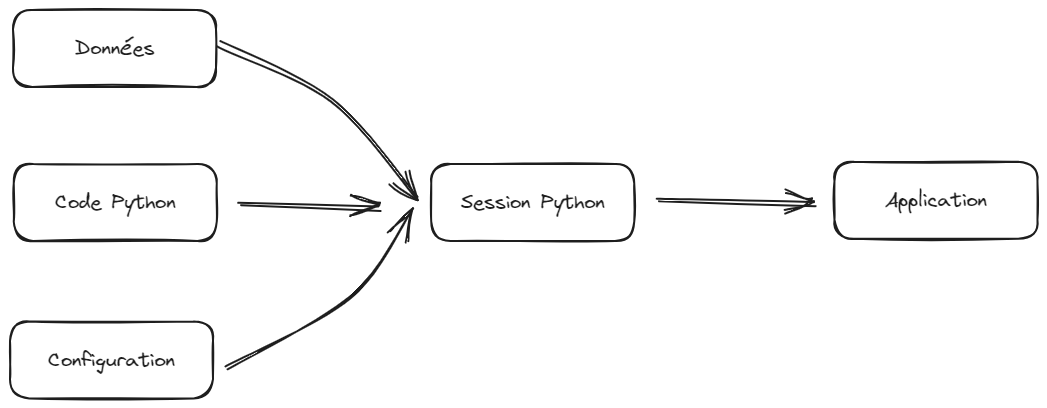

The idea is to find a way to include configuration elements with the code without exposing them directly in the code. The general approach is to store the token value in a variable without revealing it in the code. How can we declare the token value without making it visible in the code?

-   For interactive code (e.g., via a *notebook*), it is possible to create a dialog box that injects the provided value into a variable. This can be done using the `getpass` package.
-   For non-interactive code, such as command-line scripts, the environment variable approach is the most reliable, provided you are careful not to include the password file in `Git`.

The following exercise will demonstrate these two methods. These methods will help us confidentially add a *payload* to authentication requests, i.e., confidential identifying information as part of a request.

## 5.2 Application

For this application, starting from question 4, we will need to create a special class that allows `requests` to override our request with an authentication token. Since it is not trivial to create without prior knowledge, here it is:

In [28]:
class BearerAuth(requests.auth.AuthBase):
    def __init__(self, token):
        self.token = token
    def __call__(self, r):
        r.headers["authorization"] = "Bearer " + self.token
        return r

We will also need this variable, which corresponds to Decathlon’s Siren.

In [29]:
siren = "500569405"

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 4: Adding a payload to a request</h3>

1.  Create an account for the INPI API (National Institute of Intellectual Property), which we will use to retrieve financial statements of companies in PDF format.
2.  Create the `username` and `password` variables using `getpass`, ensuring the values are not hardcoded.
3.  Using the [API documentation](https://www.inpi.fr/sites/default/files/documentation%20technique%20API_comptes_annuels%20v4_0.pdf) and the `json` argument of `requests.post`, retrieve an authentication token and store it in a variable `token`.
4.  Retrieve the data using the *f-string* `f'https://registre-national-entreprises.inpi.fr/api/companies/{siren}/attachments'` and provide `requests` with the argument `auth=BearerAuth(token)`.
5.  Create `identifier = documents.get('bilans')[0]['id']` and use `requests` with the URL `f'https://registre-national-entreprises.inpi.fr/api/bilans/{identifier}/download'`, without arguments, to retrieve a PDF. Did it work? Check the *status code*. What does it mean? How can this be avoided?
6.  Assuming the `requests.get` object created is named `r`, write the API output to a PDF as follows:

``` python
binary_file_path = 'decathlon.pdf'
with open(binary_file_path, 'wb') as f:
    f.write(r.content)
```

1.  Replace the use of `getpass` with the environment variable approach using [`dotenv`](https://pypi.org/project/python-dotenv/).

</div>

For question 5, without an identifier, we get the error code 401, which corresponds to *“Unauthorized”*, meaning the request is denied. However, if we add the token as before, everything works fine, and we retrieve Decathlon’s financial statement.

The retrieved PDF

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

The environment variable approach is the most general and flexible. However, it is crucial to ensure that the `.env` file storing the credentials is not added to `Git`. Otherwise, you risk exposing identifying information, which negates any benefits of the good practices implemented with `dotenv`.

The solution is simple: add the `.env` line to `.gitignore` and, for extra safety, include `*.env` in case the file is not at the root of the repository. To learn more about the `.gitignore` file, refer to the [Git chapters](../../content/git/index.qmd).

</div>

# 6. Opening Up to Model APIs

So far, we have explored data APIs, which allow us to retrieve data. However, this is not the only interesting use case for APIs among `Python` users.

There are many other types of APIs, and model APIs are particularly noteworthy. They allow access to pre-trained models or even perform inference on specialized servers with more resources than a local computer (more details in the *machine learning* and NLP sections). The most well-known library in this field is the [`transformers`](https://pypi.org/project/transformers/) library developed by `HuggingFace`.

One of the objectives of the [3rd-year production deployment course](https://ensae-reproductibilite.github.io/website/) is to demonstrate how this type of software architecture works and how it can be implemented for models you have created yourself.

# 7. Additional Exercises: et si on ajoutait des informations sur la valeur ajoutée des lycées ?

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Bonus Exercise</h3>

In our example on schools, limit the scope to high schools and add information on the added value of high schools available [here](https://data.education.gouv.fr/explore/dataset/fr-en-indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique/table/?sort=-annee).

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Bonus Exercise 2: Where are we going out tonight?</h3>

Finding a common place to meet friends is always a subject of tough negotiations. What if we let geography guide us?

1.  Create a `DataFrame` recording a series of addresses and postal codes, like the example below.
2.  Adapt the code from the exercise on the BAN API, using its documentation, to geolocate these addresses.
3.  Assuming your geolocated data is named `adresses_geocoded`, use the proposed code to transform them into a polygon.
4.  Calculate the centroid and display it on an interactive `Folium` map as before.

You forgot there’s a couple in the group… Take into account the `poids` variable to calculate the barycenter and find out where to meet tonight.

<details>

<summary>

Create the polygon from the geolocations

</summary>

``` python
from shapely.geom
etry import Polygon
coordinates = list(zip(adresses_geocoded['longitude'], adresses_geocoded['latitude']))
polygon = Polygon(coordinates)

polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon])
polygon
```

</details>

</div>

The example DataFrame:

In [38]:
adresses_text = pd.DataFrame(
  {
    "adresse": [
        "10 Rue de Rivoli",
        "15 Boulevard Saint-Michel",
        "8 Rue Saint-Honoré",
        "20 Avenue des Champs-Élysées",
        "Place de la Bastille",
    ],
    "cp": ["75004", "75005", "75001", "75008", "75011"],
    "poids": [2, 1, 1, 1, 1]
})
adresses_text

The geolocation obtained for this example

Here is the map obtained from the example dataset. We might stay drier with the barycenter than with the centroid.

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_a2345dc0cc1f798ba6fc2361fe144fa2 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_a2345dc0cc1f798ba6fc2361fe144fa2" ></div>
 
</body>
<script>
 
 
 var map_a2345dc0cc1f798ba6fc2361fe144fa2 = L.map(
 "map_a2345dc0cc1f798ba6fc2361fe144fa2",
 {
 center: [48.85575948775739, 2.350034265202827],
 crs: L.CRS.EPSG3857,
 zoom: 13,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_64042a3bcdd7c63c9b1acdcf43885e2b = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_64042a3bcdd7c63c9b1acdcf43885e2b.addTo(map_a2345dc0cc1f798ba6fc2361fe144fa2);
 
 

 function geo_json_a615028681ce20854d834277f2eddce6_onEachFeature(feature, layer) {
 layer.on({
 });
 };
 var geo_json_a615028681ce20854d834277f2eddce6 = L.geoJson(null, {
 onEachFeature: geo_json_a615028681ce20854d834277f2eddce6_onEachFeature,
 
 });

 function geo_json_a615028681ce20854d834277f2eddce6_add (data) {
 geo_json_a615028681ce20854d834277f2eddce6
 .addData(data);
 }
 geo_json_a615028681ce20854d834277f2eddce6_add({"bbox": [2.302859, 48.851852, 2.370213, 48.871285], "features": [{"bbox": [2.302859, 48.851852, 2.370213, 48.871285], "geometry": {"coordinates": [[[2.36041, 48.8555], [2.343614, 48.851852], [2.334511, 48.863787], [2.302859, 48.871285], [2.370213, 48.853711], [2.36041, 48.8555]]], "type": "Polygon"}, "id": "0", "properties": {}, "type": "Feature"}], "type": "FeatureCollection"});
 geo_json_a615028681ce20854d834277f2eddce6.setStyle(function(feature) {return feature.properties.style;});

 
 
 geo_json_a615028681ce20854d834277f2eddce6.addTo(map_a2345dc0cc1f798ba6fc2361fe144fa2);
 
 
 var marker_647b3835d148414f13ba625cc03bb49a = L.marker(
 [48.8555, 2.36041],
 {}
 ).addTo(map_a2345dc0cc1f798ba6fc2361fe144fa2);
 
 
 var popup_4ae9f1041c63909aad66d199d5c88fd9 = L.popup({"maxWidth": "100%"});

 
 
 var html_2beb8a60138c98be5bdaa28a0f3a8785 = $(`<div id="html_2beb8a60138c98be5bdaa28a0f3a8785" style="width: 100.0%; height: 100.0%;">10 Rue de Rivoli</div>`)[0]